# Lab 3: Mic Board and Intro to RC Circuits

### EE 16B: Designing Information Devices and Systems II, Spring 2019


## Table of Contents


* [Introduction](#intro)
* [Task 1: Solder mic board](#task1)
* [Task 2: Test your mic board](#task2)
* [Task 3: Capacitor Value](#task3)

<a id='part1'></a>
# <span style="color:navy">Part 1: Soldering</span>

### Materials
- Soldering iron
- Solder
- Perf board
- Wires

## Tasks

### 1.1. Watch the soldering video

In [ ]:
from IPython.display import IFrame

IFrame("https://www.youtube.com/embed/f95i88OSWB4", 560, 315)

### 1.2. Practice Soldering

- Practice soldering the wires to the perf-board.

**Tips:**
- Don't touch the iron while it's hot -- use the handle!
- [See more tips in the note](note3_micboard.pdf)

# DO NOT DO THIS:
![i'm serious](images/bad_soldering.jpg)

<a id='part2'></a>
# <span style="color:navy">Part 2: Making your Mic Board</span>

### Materials
- 1 x microphone
- 1 x Op Amp
- 1 x 8-pin socket
- 2 x 1 uF Capacitors
- 1 x 10 k$\Omega$ Resistor
- 1 x 1 k$\Omega$ Resistor
- 1 x 50 k$\Omega$ Potentiometer
- 6 x Jumper pins (don't break apart!)
- 1 x Mic board PCB

## Tasks

### 1.1. Build your mic board
- Follow the instructions in [MicBoard.pdf](./MicBoard.pdf)
    - **Note: Pay careful attention to the orientation of the PCB board and the resister values that you are soldering. Double check all components with schematic before soldering to avoid mistakes.**


### 1.2. Test your mic board
**Setup:**
1. Start by making sure that your micboard is powered by **5V at VDD** and **-5V at VSS**.
2. Make sure **OS2 is grounded** and **OS1 is connected to ground by a 100K ohm** resistor.
3. Connect an oscilloscope cable to the output.
4. Display a **peak to peak measurement** for the oscilloscope channel used to measure.

**Now you are ready to tune your mic board!**
1. **Play a 1000Hz pure tone** on your phone at a reasonable volume. Make sure to point the speaker directly at the mic and hold it a few inches away from the mic.
2. Turn the potentiometer (with a screwdriver instead of your fingers for finer increments in gain) until you see an a sine wave with a **peak-to-peak around 5V** on your oscilloscope.
3. Verify that the frequency of the measured sinewave is 1000Hz using your oscilloscope. You may need to adjust the time scale on the display.

Frequency of a sine wave:

$$f = \frac{1}{T}$$

where $T$ is the *period*, or the length of 1 cycle in the sine wave.

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">

## <span style="color:green">CHECKPOINT 1</span>
<span style="color:green">Don't submit a checkoff request at this point. Just raise your hand and show your GSI your the mic board output on the oscilloscope display.</span>

<a id='part2'></a>
## <span style="color:navy">Part 2: Mystery Capacitor</span>

### Materials
- Mystery Capacitor
- Known Resistor
- Switch
- Oscilloscope
- Power Supply

To estimate the value of the capacitor, we can measure the time it takes for the capacitor to charge and reach a specific voltage. Remember that capacitors take a while to fully charge and reach steady state. This means that we can build the following circuit which charges the capacitor to let us estimate its value:

<img style="width: 250px" src="images/mystery_circuit.png">

You may find the following equations useful:

Capacitence: $ Q = CV(t) $

Relationship between charge and current: $\frac{dQ}{dt} = i(t)$

# Questions

**<span style="color:green">1. Find I in terms of battery voltage $V_{bat}$, capacitor voltage $V_c$, and $R$.</span>**

**<span>Assume the capacitor is not charged. At time t=0, you flip the switch.</span>**

**<span style="color:green">2. Find an equation for the voltage across the capacitor $V_C(t)$ in terms of $R$, $C$, and $t$ at exactly time $t=0$.</span>**
`
0

**<span style="color:green">3. Find an equation for the voltage across the capacitor $V_C(t)$ in terms of $R$, $C$, and $t$ when the switch is closed and the circuit is in steady state ($t=\infty$).</span>**
Vbat

**<span style="color:green">4. Find an equation for the voltage across the capacitor $V_C(t)$ in terms of $R$, $C$, and $t$ that describes the behavior between $t=0$ and $t=\infty$.</span>**

**<span style="color:green">5. Now rearrange your solution to the previous question to find $C$ in terms of the other variables, and implement the solution in Python below:</span>**

*HINT: you may find the function `np.log` useful.*

In [1]:
import numpy as np

def compute_capacitance(t, V_C, R, V_DD=5):
    return -t/(R* np.log(1-V_C/V_DD))

## Tasks

### Solving the Mystery Capacitor

**Setup:**
1. Build the above circuit using $R = 100k\Omega$ or $R = 200k\Omega$.
2. Connect the oscilloscope probe across the capacitor to measure $V_C(t)$.
3. Set the time scale of the oscilloscope to 500ms or greater and the vertical scale 2V or greater. **Do not use autoscale.**
4. Verify that the **switch is open (no current can pass)** and that **the nodes surrounding the capacitor are 0V.**

**Now you are ready to charge the capacitor!**

1. **Flip the switch** so the capacitor is charging.
2. **Press the "Stop" button** on the oscilloscope once the display captures a large portion of the curve.


**Analyze the results:**
1. Use the cursors on the oscilloscope to find a time using "delta x" and a voltage using "delta y":
    1. Press the "cursor" button under "measure"
    2. Set the mode to "track" in the cursors menu.
    3. Adjust $x_1$ to line up with the start of the rising curve.
    4. Set $x_2$ to any value before the curve reaches its maximum value.
    5. HINT: try to use a nice "delta x" value.
2. Use the "delta x" and "delta y" values from the oscilloscope to compute the value of the mystery capacitor.

In [12]:
# YOUR CODE HERE: fill in these values
t = 2
V_t = 3
R = 100000
V_DD = 5

In [13]:
C_myst = compute_capacitance(t, V_t, R, V_DD)

print(C_myst)

2.18271333587e-05


**<span style="color:green">What is the value of your capacitor?</span>**

Great job! You have solved the mystery and learned how circuits involving capacitors behave according to the differential equations taught in lecture.

<a id='part3'></a>
## <span style="color:navy">Part 3: Filters</span>

### Materials
- Circuit from Part 2
- Function generator
- Oscilloscope
- Power Supply

## Tasks

### 3.1. Flip the Switch

**Setup:**
1. Make sure the top pin on the switch is connected to +5V.
2. Connect the middle pin on the switch to your resistor from Part 2.
3. Conncet the bottom pin on the switch to -5V.

Your new circuit should look like the diagram below:
![circuit](images/TwoWaySwitch.png)

**Experiment:**
1. Set the time resolution on your oscilloscope to either 500 ms or 1 s, and the voltage resolution to 2V per division.
2. Flip the switch between on and off at a slow, regular pace, and observe $V_C(t)$ on the oscilloscope.
3. Now flip the switch rapidly, and observe $V_C(t)$ on the oscilloscope.

**<span style="color:green">How does the speed at which you flip the switch affect $V_C(t)$? Is the peak-to-peak voltage larger when flipping quickly or slowly?</span>** slowly

## 3.2. Automatic switch flipping

Now we'll replace the switch which simulates a square wave from -5V to +5V using your function generator.

**Setup:**
1. Remove the switch.
2. Change your resistor to 1k$\Omega$.
3. Connect the function generator to the resistor.
4. Generate a 10 Vpp (Vpp mean peak-to-peak) sine wave.
    - *Remember to set your function generator to High Z!*

**Experiment:**
1. Set the function generator's frequency to the frequencies given in code below.
2. For each frequency, record the peak-to-peak voltage observed on the oscilloscope.
    - Hint: Press the "Meas" button, set "Type" to "Voltage/Peak-Peak", and then "Add Measurement"

In [22]:
# Frequencies given in Hz
frequencies = [1, 5, 10, 20, 40, 60, 80, 100, 200, 500, 1000, 10000]

# YOUR CODE HERE:
peak_to_peak_voltages = [2.1, 2.2, 1.4, 0.9, 0.6, .4, .3, .2, .1, .08, .06, .04]

## 3.3. Analyzing your results

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

Plot your results below:

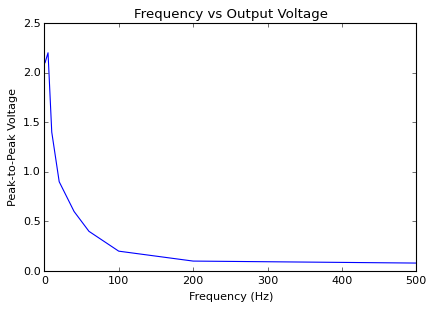

In [24]:
plt.xlabel("Frequency (Hz)")
plt.ylabel("Peak-to-Peak Voltage")
plt.title("Frequency vs Output Voltage")
plt.plot(frequencies[:-2], peak_to_peak_voltages[:-2])

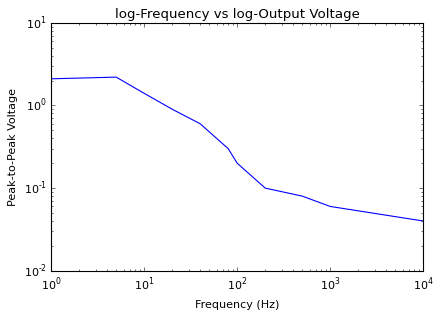

In [25]:
plt.xlabel("Frequency (Hz)")
plt.ylabel("Peak-to-Peak Voltage")
plt.title("log-Frequency vs log-Output Voltage")
plt.loglog(frequencies, peak_to_peak_voltages)

**<span style="color:green">What do you notice as the frequency increases?</span>**

**<span style="color:green">Explain why you observed these results. Hint: how the frequency of the input affect the charging of the capacitor?</span>**

**<span style="color:green">Find the voltage where the resistor dissipates half of the power.</span>**

Hint 1: recall that $P = \frac{V_{in}^2}{R}$, so $\frac{P}{2} = \frac{V_{\text{half power}}^2}{R}$ where $R$ and $P$ remain constant. Solve for $V_{\text{half power}}$ in terms of $V_{in}$.

Hint 2: $V_{in}$ is the peak-to-peak voltage of your sine-wave coming from the function generator.

**<span style="color:green">Locate the frequency where the resistor dissipates half of the power using the graph.</span>**

Hint: consider adjusting the range of frequences plotted to zoom in on a section.

**<span style="color:green">Convert this frequency to radians.</span>**

**<span style="color:green">Multiply your resistor value $R$ by your capacitor value $C$. What do you notice about the relationship between the cutoff frequency and $RC$?</span>**

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<h2><span style="color:green">Checkoff</span></h2>

- Complete [this quiz](https://goo.gl/forms/bzlzPgYRSucIuIlH3).
- Show mic board working and its frequency response.
- Show capacitor calculations for value of capacitor.
- Show your analysis.
- Return mystery capacitor **after checkoff**.